# Basic Pandas/Numpy operations

## How to use pandas to load data

In [1]:
# use pandas to read and manipulate data
import numpy as np
import pandas as pd

# read csv file from either a local file system, or from url
file_path = "../../data/simple_linear_regression.csv"
# file_path = "https://raw.githubusercontent.com/changyaochen/MECE4520/master/data/simple_linear_regression.csv"
data = pd.read_csv(file_path, header=None)  # the file does not contain header
data.head()

,0,1
0,-15.000,-356.996
1,-14.824,-394.723
2,-14.648,-326.049
3,-14.472,-250.838
4,-14.296,-373.231


In [2]:
# name the columns
data = data.rename(columns={0: "x", 1: "y"})
data.head()

,x,y
0,-15.000,-356.996
1,-14.824,-394.723
2,-14.648,-326.049
3,-14.472,-250.838
4,-14.296,-373.231


## How to use numpy to do calculation, including matrix operations

In [3]:
# get the data as numpy array
X1 = data["x"].values
X1[:5]

array([-15.   , -14.824, -14.648, -14.472, -14.296])

In [4]:
# get the sample standard deviation of X1
np.std(X1, ddof=1)

10.179740620245557

In [5]:
# append columns to numpy array
X = np.hstack((
    np.ones(shape=(len(X1), 1)),  # a column with ones
    X1.reshape(-1, 1),  # turn the row vector to column vector
))
X[:5, :]

array([[  1.   , -15.   ],
       [  1.   , -14.824],
       [  1.   , -14.648],
       [  1.   , -14.472],
       [  1.   , -14.296]])

In [6]:
# matrix multiplication
y = data["y"].values
beta = np.array([10, 20])
(y - X @ beta)[:5]

array([ -66.996, -108.243,  -43.089,   28.602,  -97.311])

In [7]:
# how to get covariance matrix
np.cov(X1, y)

array([[  103.6271191 ,  1679.34249677],
       [ 1679.34249677, 33447.31803076]])

In [8]:
# special case, covariance to oneself
np.sqrt(np.cov(X1, X1))

array([[10.17974062, 10.17974062],
       [10.17974062, 10.17974062]])

## How to use matplotlib/seaborn to visualize data

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# figure style configuration
sns.set(font_scale=1.5)
sns.set_style("whitegrid", {'grid.linestyle':'--'})

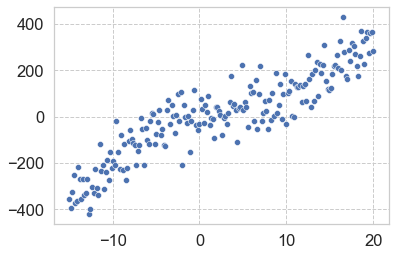

In [10]:
# scatter plot
plt.figure()
sns.scatterplot(x=X1, y=y)
# sns.scatterplot(x="x", y="y", data=data)  # work as well
plt.show()

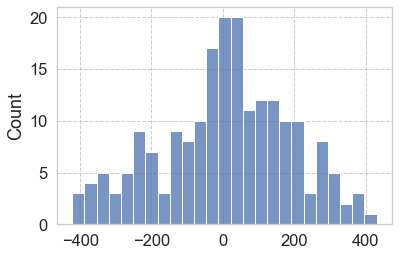

In [11]:
# histogram
plt.figure()
sns.histplot(data=y, bins=25)
plt.show()

## How to use z-statistic

![Image of z-test](https://upload.wikimedia.org/wikipedia/commons/1/1c/Null-hypothesis-reigon-eng.png)

In [12]:
# find the p-value from z-statistic
from scipy.stats import norm

norm.sf(x=1.96)  # from z-statistic to find the area under the pdf curve to the right

0.024997895148220435

In [13]:
norm.ppf(q=0.975)  # from quantile to find corresponding value, inverse of 1 - cdf

1.959963984540054

In [14]:
# find the p-value from t-statistic
from scipy.stats import t

t.sf(x=1.96, df=100) # from t-statistic to find the area under the pdf curve to the right

0.026389450683114827

In [15]:
t.ppf(q=0.975, df=100)  # from quantile to find corresponding value, inverse of 1 - cdf

1.9839715184496334

## Linear regression review

In [145]:
import statsmodels.formula.api as smf
data = pd.read_csv("../../data/ads_spend.csv")
data.head()

,Facebook,Google,TV,revenue,date_index
0,82.502345,112.867070,53.781519,345.055930,0
1,111.530358,107.887969,162.401419,618.671168,1
2,109.813208,114.302263,60.090020,479.382401,2
3,102.211797,101.047375,70.084840,333.500872,3
4,98.105042,112.133495,96.838614,621.539806,4


In [149]:
# simple linear regression with the `statsmodels` library
model = smf.ols(formula='revenue ~ TV + Google + Facebook', data=data)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     18.51
Date:                Mon, 11 Oct 2021   Prob (F-statistic):           1.82e-08
Time:                        21:03:32   Log-Likelihood:                -361.58
No. Observations:                  60   AIC:                             731.2
Df Residuals:                      56   BIC:                             739.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    174.7055     69.307      2.521      0.0

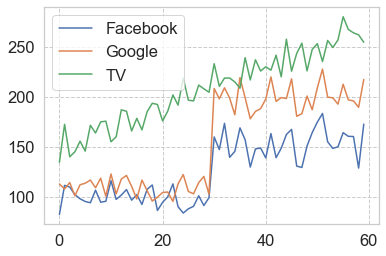

In [140]:
data[[c for c in data.columns if c != "revenue"]].plot()

In [150]:
data.corr()

,Facebook,Google,TV,revenue,date_index
Facebook,1.000000,0.941894,0.407327,0.510043,0.795056
Google,0.941894,1.000000,0.415247,0.485305,0.842611
TV,0.407327,0.415247,1.000000,0.651902,0.490549
revenue,0.510043,0.485305,0.651902,1.000000,0.436903
date_index,0.795056,0.842611,0.490549,0.436903,1.000000
